K is fixed as 3 for all cases. Need to generalize

In [1]:
# !rm -rf downloads

In [2]:
# !rm dataset.xlsx

DATA PREPARATION

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pytube

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#pip install opencv-python

In [7]:
#pip install tensorflow

In [8]:
import pandas as pd
import xml.etree.ElementTree as ET
import cv2
import math
from random import sample
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube

from sklearn.model_selection import train_test_split

import os

In [10]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def retDownload(url,fileName):
    try:
        yt = YouTube(url)
        stream = yt.streams.filter(progressive = True, file_extension = "mp4" , res="360p").first()
        stream.download(filename = fileName)
        return True
    except:
        return False

In [ ]:
def downloadVideo(url, fileName):
      for i in (0,4):
        if(retDownload(url,fileName)):
          return True
        else:
          return False

In [ ]:
def retCaption(link,code):
    src = YouTube(link)
    try:
      captions=src.captions
      enCaption = captions[code]
      root=ET.fromstring(enCaption.xml_captions)
      textElement=root.find('body').findall('p')
      return (textElement, True)
    except:
      return (None, False)

In [ ]:
def getCaptions(link):
    for i in (0,10):
      captions,status=retCaption(link,'en')
      if(status):
        return (captions,True)
    for i in (0,10):
      captions,status=retCaption(link,'en-IN')
      if(status):
        return (captions,True)
    
    return (None,False)

In [ ]:
# times is in milli seconds
def extract_frames(video_path, start_time, end_time, k):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    start_frame = int(start_time / 1000 * fps)
    end_frame = int(end_time / 1000 * fps)

    frame_interval = int((end_frame - start_frame) / (k - 1))

    selected_frames = []

    for i in range(k):
        frame_index = start_frame + i * frame_interval
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if not ret:
          print("Error occured at getting frames")
          break
        
        # resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH)) - restricting for 64, 64

        resizedFrame = cv2.resize(frame, (64, 64))

        # normalized frames. If you need to show image, don't normalize it
        normalizedFrame = resizedFrame / 255

        selected_frames.append(normalizedFrame)
        # frame_time = frame_index / fps

    cap.release()
    return selected_frames


In [ ]:
def showImage(sentence, images, label):
  # Commented. Use this if you need to visualize the considered frames
  for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(images[i][:,:,::-1])
    plt.axis('off')
  
  plt.title("Sentence: " + sentence + " Label: " + str(label))
  plt.show()

In [ ]:
def convertToMilliSeconds(number):
  decPart, integerPart = math.modf(number)
  seconds = int(integerPart)*60 + int(decPart*100)
  milliSeconds = seconds*1000
  return milliSeconds

In [ ]:
def processVideo(videoUrl,index,adStart,adEnd):
    captions, statusC = getCaptions(videoUrl)
    if(statusC):
        statusD = downloadVideo(videoUrl, str(index) + ".mp4")
        if(statusD):
            sentencesAll=[]
            framesAll=[]
            labelsAll=[]
            for caption in captions:
                startTime = int(caption.attrib['t'])
                endTime = startTime + int(caption.attrib['d'])
                sentence = caption.text
                framesWithinTime = extract_frames(str(index) + ".mp4", startTime, endTime, 20)
                sentencesAll.append(sentence)
                framesAll.append(framesWithinTime)
                if startTime >= adStart and endTime <= adEnd:
                    labelsAll.append(1)
                else:
                    labelsAll.append(0)
            return (True,sentencesAll,framesAll,labelsAll)
    return (False,[],[],0)

In [ ]:
# Tvideo="https://youtu.be/jZxYZZ151To"
# adStart=convertToMilliSeconds(2.54)
# adEnd=convertToMilliSeconds(5.2)
# status,sentence,frames,label=processVideo(Tvideo,1,adStart,adEnd)


In [ ]:
# for i in range(len(label)):
#     if(label[i]):
#        print(label[i])
# len(label)

In [ ]:
# len(sentence)

1  files done    0
2  files done    1
3  files done    2
4  files done    2
5  files done    3
6  files done    4
7  files done    5
8  files done    6
9  files done    7
10  files done    8
11  files done    9
12  files done    10
13  files done    11
14  files done    12
15  files done    13
16  files done    13
17  files done    14
18  files done    14
19  files done    15
20  files done    16
21  files done    16
22  files done    17
23  files done    18
24  files done    19
25  files done    19
26  files done    19
27  files done    20
28  files done    20
29  files done    21
30  files done    21
31  files done    21
32  files done    22
33  files done    23
34  files done    23
35  files done    24
36  files done    25
37  files done    26
38  files done    27
39  files done    28
40  files done    29
41  files done    30
42  files done    30
43  files done    31
44  files done    32
45  files done    33
46  files done    34
47  files done    34
48  files done    34
49  files do

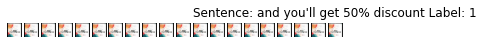

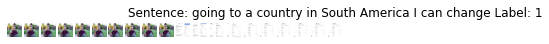

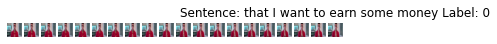

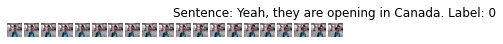

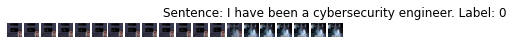

In [ ]:
#Dataset in list format creation part
sentences = []
frames = []
labels = []


sentences0 = []
frames0 = []
labels0 = []

sentences1 = []
frames1 = []
labels1 = []

failed=[]

df = pd.read_excel('dataset.xlsx', sheet_name='final')
failCount = 0
successCount = 0


for index, row in df.iterrows():
    videoUrl = row['Video Links']
    print(str(index + 1), " files done   ",successCount)
    adStart=convertToMilliSeconds(row['Start Time'])
    adEnd=convertToMilliSeconds(row['End Time'])
    status,sentencesAll,framesAll,labelsAll=processVideo(videoUrl,index,adStart,adEnd)
    if(status):
      successCount+=1
      for i in range(len(sentencesAll)):
        if labelsAll[i]:
          sentences1.append(sentencesAll[i])
          frames1.append(framesAll[i])
          labels1.append(1)
        else:
          sentences0.append(sentencesAll[i])
          frames0.append(framesAll[i])
          labels0.append(0)
      os.remove(str(index) + ".mp4")
    else:
      failed.append(index)
      failCount+=1
          

# check all three has same length for safety
print("Not ad data size: ", len(sentences0), " , Ad data size: ", len(sentences1))

# More ads
if(len(sentences0) <= len(sentences1)):
  sentences = sentences + sentences0 + sentences1[:len(sentences0)]
  frames = frames + frames0 + frames1[:len(frames0)]
  labels = labels + labels0 + labels1[:len(labels0)]
else:
  sentences = sentences + sentences1 + sentences0[:(len(sentences1))]
  frames = frames + frames1 + frames0[:(len(frames1))]
  labels = labels + labels1 + labels0[:(len(labels1))]

  
print("Success count: ", successCount)
print("Fail count: ", failCount)
print("Total videos: ", successCount + failCount)

sampleData = sample( range(len(sentences)) , 5)

for i in sampleData:
  showImage(sentences[i], frames[i], labels[i])


In [ ]:
# All are in list
sentences_train, sentences_test, frames_train, frames_test, labels_train, labels_test = train_test_split(sentences, frames, labels, test_size = 0.25, shuffle = True, random_state = 17)

In [ ]:
# convert frames to tensor
framesTrain = tf.convert_to_tensor(frames_train, dtype=tf.float32)
framesTest = tf.convert_to_tensor(frames_test, dtype=tf.float32)

labelsTrain = tf.constant(labels_train, dtype=tf.int32)
labelsTest = tf.constant(labels_test, dtype=tf.int32)



FRAMES MODEL PART

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:

frameInput = tf.keras.Input(shape=(20, 64, 64, 3), name = 'framesInput')
conv_2d_layer = tf.keras.layers.Conv2D(16, (3, 3), padding='same')
layer1 = tf.keras.layers.TimeDistributed(conv_2d_layer)(frameInput)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(4, 4))
layer2 = tf.keras.layers.TimeDistributed(max_pool_2d)(layer1)
layer3 = tf.keras.layers.Dropout(0.25)(layer2)

conv_2d_layer = tf.keras.layers.Conv2D(32, (3, 3), padding = 'same')
layer4 = tf.keras.layers.TimeDistributed(conv_2d_layer)(layer3)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(4, 4))
layer5 = tf.keras.layers.TimeDistributed(max_pool_2d)(layer4)
layer6 = tf.keras.layers.Dropout(0.25)(layer5)

conv_2d_layer = tf.keras.layers.Conv2D(64, (3, 3), padding = 'same')
layer7 = tf.keras.layers.TimeDistributed(conv_2d_layer)(layer6)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
layer8 = tf.keras.layers.TimeDistributed(max_pool_2d)(layer7)
layer9 = tf.keras.layers.Dropout(0.25)(layer8)

conv_2d_layer = tf.keras.layers.Conv2D(64, (3, 3), padding = 'same')
layer10 = tf.keras.layers.TimeDistributed(conv_2d_layer)(layer9)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
layer11 = tf.keras.layers.TimeDistributed(max_pool_2d)(layer10)

flatten = tf.keras.layers.Flatten()
layer12 = tf.keras.layers.TimeDistributed(flatten)(layer11)

lstm = tf.keras.layers.LSTM(32)
layer13 = lstm(layer12)
frameLayer = tf.keras.layers.Dense(20, activation='softmax')(layer13)

In [ ]:
# LRCN_model = create_LRCN_model()

In [ ]:
# Plot the structure of the contructed LRCN model.
# plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

SENTENCES MODEL PART

In [ ]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import GPT2Tokenizer, TFGPT2Model
from statistics import mean


In [ ]:
import re

def dataCleaning(text):
  # remove mentions
  
  text = re.sub("@\S+", " ", text)

  # remove hashtags
  text = re.sub("#\S+", " ", text)

  # remove urls
  text = re.sub("https*\S+", " ", text)

  # remove newlines and tabs
  text = text.replace('\n', ' ')
  text = text.replace('\t', ' ')

  # remove unicode characters
  text = text.encode('ascii', 'ignore').decode()

  # remove overspaces
  text = re.sub('\s{2,}', " ", text)

  return text

sentences_train = [dataCleaning(sentence) for sentence in sentences_train]
sentences_test = [dataCleaning(sentence) for sentence in sentences_test]
sentences = [dataCleaning(sentence) for sentence in sentences]


In [ ]:
MAX_LENGTH = math.ceil(mean(list(map(lambda x: len(str(x).split()), sentences))))+2
MAX_LENGTH

11

In [ ]:
PAD_TOKEN = "<|pad|>"
EOS_TOKEN = "<|endoftext|>"

# this will download and initialize the pre trained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2",
    pad_token=PAD_TOKEN,
    eos_token=EOS_TOKEN,
    max_length=MAX_LENGTH,
    is_split_into_words=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
sentences_train = [sentence + EOS_TOKEN for sentence in sentences_train]
sentences_test = [sentence + EOS_TOKEN for sentence in sentences_test]

print(sentences_train[0])

But how did they get the push in US?<|endoftext|>


In [ ]:
sentence_train_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in sentences_train]
sentence_test_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in sentences_test]


sentence_train_in = tf.squeeze(tf.convert_to_tensor(sentence_train_), axis=1)
sentence_test_in = tf.squeeze(tf.convert_to_tensor(sentence_test_), axis=1)

C:\Users\106119049\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
sentence_train_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in sentences_train]
sentence_test_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in sentences_test]

sentence_train_mask = tf.squeeze(tf.convert_to_tensor(sentence_train_mask_), axis=1)
sentence_test_mask = tf.squeeze(tf.convert_to_tensor(sentence_test_mask_), axis=1)

In [ ]:
model = TFGPT2Model.from_pretrained("gpt2", use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id)
model.training = True

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
model.resize_token_embeddings(len(tokenizer))

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "tfgpt2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 124440576 
 r)                                                              
                                                                 
Total params: 163,038,720
Trainable params: 38,598,144
Non-trainable params: 124,440,576
_________________________________________________________________


In [ ]:
input = tf.keras.layers.Input(shape=(None,), dtype='int32', name = 'sentenceInput')
mask = tf.keras.layers.Input(shape=(None,), dtype='int32', name = 'maskInput')
x = model(input, attention_mask=mask)
#x = x.last_hidden_state[:, -1]
x = tf.reduce_mean(x.last_hidden_state, axis=1)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Obtaining sentence based informations
sentenceLayer = tf.keras.layers.Dense(20, activation='softmax')(x)

In [ ]:
# clf = tf.keras.Model([input, mask], output)

In [ ]:
# clf.summary()

MODEL COMBINING

In [ ]:
concat = tf.keras.layers.concatenate([sentenceLayer, frameLayer],name="concatenated_layer")

In [ ]:
output_layer = tf.keras.layers.Dense(2, activation = "softmax", name = "output_layer")(concat)

In [ ]:
full_model = tf.keras.Model(inputs=[input, mask, frameInput], outputs=[output_layer])

print(full_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 framesInput (InputLayer)       [(None, 20, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 time_distributed (TimeDistribu  (None, 20, 64, 64,   448        ['framesInput[0][0]']            
 ted)                           16)                                                               
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 20, 16, 16,   0          ['time_distributed[0][0]']       
 buted)                         16)                                                           

In [ ]:
plot_model(full_model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
base_learning_rate = 0.0005
optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
#loss=tf.keras.losses.BinaryCrossentropy()
loss=tf.keras.losses.SparseCategoricalCrossentropy()

full_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=15, mode = 'min', restore_best_weights=True)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
history = full_model.fit([sentence_train_in, sentence_train_mask, framesTrain], labelsTrain, epochs=70, batch_size=10, validation_split=0.2, callbacks=callbacks)

Epoch 1/70


C:\Users\106119049\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


138/138 [==============================] - 458s 3s/step - loss: 0.6948 - accuracy: 0.5207 - val_loss: 0.6749 - val_accuracy: 0.5478
Epoch 2/70
138/138 [==============================] - 456s 3s/step - loss: 0.6255 - accuracy: 0.6986 - val_loss: 0.5734 - val_accuracy: 0.7913
Epoch 3/70
138/138 [==============================] - 461s 3s/step - loss: 0.5494 - accuracy: 0.7836 - val_loss: 0.5222 - val_accuracy: 0.8029
Epoch 4/70
138/138 [==============================] - 472s 3s/step - loss: 0.5065 - accuracy: 0.8119 - val_loss: 0.5074 - val_accuracy: 0.7942
Epoch 5/70
138/138 [==============================] - 460s 3s/step - loss: 0.4771 - accuracy: 0.8235 - val_loss: 0.4829 - val_accuracy: 0.8174
Epoch 6/70
138/138 [==============================] - 465s 3s/step - loss: 0.4457 - accuracy: 0.8344 - val_loss: 0.4392 - val_accuracy: 0.8348
Epoch 7/70
 44/138 [========>.....................] - ETA: 4:52 - loss: 0.4006 - accuracy: 0.8705

In [ ]:
full_model.evaluate([sentence_test_in, sentence_test_mask, framesTest], labelsTest)

In [ ]:
full_model.training = False
label_pred = full_model.predict([sentence_test_in, sentence_test_mask, framesTest])

In [ ]:
label_pred_out = tf.math.argmax(label_pred, axis=-1)
labels_prediction=np.array(label_pred_out)

In [ ]:
for l in labels_prediction:
    print(l,end=" ")
    
print()
for l in labels_test:
    print(l,end=" ")